In [11]:
import sys
import numpy as np
sys.path.append("..")
from fireballpy import Fireball
from ase import Atoms
from ase.eos import EquationOfState
from ase.units import kJ

In [12]:
ETOT=[]
VOL=[]
for a in [5.00,5.20,5.40,5.60,5.80]:
    
    atoms = Atoms(symbols=['Si', 'Si'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
    atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])

    atoms.calc = Fireball(charges='Mulliken-dipole-preserving', 
                      options='periodic',
                      kpts_monkhorst_pack_ind=[4,4,4]
                     )

    ETOT.append(atoms.get_potential_energy())
    VOL.append(atoms.get_volume())

In [13]:
print(ETOT)
print(VOL)

[-210.70906711613097, -211.4496367245739, -211.7573690659773, -211.7102620780995, -211.44311786703278]
[31.250000000000007, 35.15200000000001, 39.36600000000002, 43.90399999999998, 48.77799999999999]


In [14]:
eos = EquationOfState(VOL,ETOT)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')

94.87682685137894 GPa


<Axes: title={'center': 'sj: E: -211.770 eV, V: 40.995 Å$^3$, B: 94.877 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

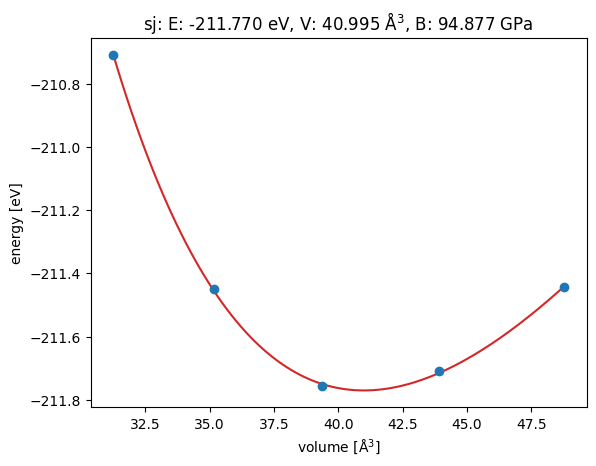

In [15]:
eos.plot()
